# Assignment 03: Machine Learning 

This week's assignment is to prepare a dataset and train a Machine Learning algorithm on the dataset to accurately predict **median house value**.
 

Before starting copy this file and work on your own copy by going to `File > Save Copy in Drive.` Then add your name to the file (e.g., Assignment 03: Machine Learning - Muntadher Alkaabi).

 

Submission Deadline: **Thursday, 2/3/2022 at 3:00 PM**

 

**Requirements:**


	
	
1. Import necessary libraries for the machine learning project.
	
	
	
2. Read and apply necessary preprocessing steps on the dataset:
    1. Drop the following columns (`longitude`, `latitude`)
		
	2. Convert the words in the `ocean_proximity` column to numeric values.
		
	3. Normalize the dataset (make sure to print info and descriptions with the histogram for the dataset).
		
	
	
	
3. Split the dataset using a 80/20 training/testing split (don't forget to set the `random_state` to 42).
	
	
	
4. Create and train 4 Machine Learning models.
	
	
	
5. Use the right evaluation metrics to choose the best model (write down your choice for the best model).
	


**Note:** To get the best performance from model, manually tune the hyperparameters of each model.

 

Find relevant links below: 

[Dataset](https://docs.google.com/spreadsheets/d/1bc0on1l8EUUPXyzTV3A09Dj07uzZAy88wSU8SoxRBGo/edit?usp=sharing)

[Submission Form](https://forms.gle/rqv8KrFTfudR2QXX9)
 

Good luck and feel free to ask any questions in the comments or on the Questions channel.

# Upload the dataset

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# Import necessary libraries for the machine learning project.

In [ ]:
# write your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, svm, metrics, preprocessing , linear_model,tree,ensemble
from sklearn.metrics import r2_score

# Read and apply necessary preprocessing steps on the dataset

In [ ]:
# read the csv file 
datasets = pd.read_csv('/content/housing.csv')

In [ ]:
# print the head of the data 
datasets.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY


In [ ]:
# print the describe of the dataframe 
datasets.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
# print the info of the dataframe
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
# drop the longitude, latitude columns 
datasets.drop(labels={'longitude','latitude'},axis=1,inplace=True)

In [ ]:
# print the info of the dataframe
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  20640 non-null  int64  
 1   total_rooms         20640 non-null  int64  
 2   total_bedrooms      20433 non-null  float64
 3   population          20640 non-null  int64  
 4   households          20640 non-null  int64  
 5   median_income       20640 non-null  float64
 6   median_house_value  20640 non-null  int64  
 7   ocean_proximity     20640 non-null  object 
dtypes: float64(2), int64(5), object(1)
memory usage: 1.3+ MB


In [ ]:
# count how many nan values are in the dataframe
datasets.isnull().sum()

housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
# fill the nan values with the mean of the 
datasets.total_bedrooms.fillna(datasets.total_bedrooms.mean(),inplace=True)


In [ ]:
# count how many nan values are in the dataframe
datasets.isnull().sum()

housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [ ]:
# convert the words to numerical values 
# create function that return two dictionary of word to index and the other index word 
def string_to_numerics(column):
  # write your code here.
  col_unique= column.unique()
  word_index={}
  index_word={}
  for index,word in enumerate(col_unique):
    word_index[word]=index
    index_word[index]=word
  # return word to index & index to word dictionaries 
  return word_index, index_word


In [ ]:
#convert the string to numeric
col_ocean_proximity = datasets.ocean_proximity
word_index,index_word = string_to_numerics(col_ocean_proximity)

datasets.ocean_proximity.replace(word_index,inplace=True)

In [ ]:
# print the dataframe
datasets

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41,880,129.0,322,126,8.3252,452600,0
1,21,7099,1106.0,2401,1138,8.3014,358500,0
2,52,1467,190.0,496,177,7.2574,352100,0
3,52,1274,235.0,558,219,5.6431,341300,0
4,52,1627,280.0,565,259,3.8462,342200,0
...,...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,78100,2
20636,18,697,150.0,356,114,2.5568,77100,2
20637,17,2254,485.0,1007,433,1.7000,92300,2
20638,18,1860,409.0,741,349,1.8672,84700,2


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775b852b90>,
      dtype=object)

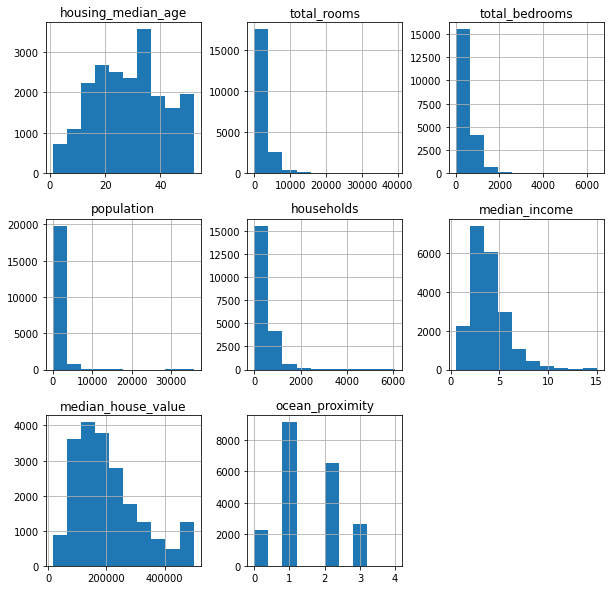

In [ ]:
# plot the hist for the dataframe 
datasets.hist(figsize=(10,10))

# Split the dataset to 20% for testing and 80% for training.

In [ ]:
# split the dataset to x and y 
x=datasets.loc[:,datasets.columns!='median_house_value']
y=datasets.median_house_value

In [ ]:
x

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,41,880,129.0,322,126,8.3252,0
1,21,7099,1106.0,2401,1138,8.3014,0
2,52,1467,190.0,496,177,7.2574,0
3,52,1274,235.0,558,219,5.6431,0
4,52,1627,280.0,565,259,3.8462,0
...,...,...,...,...,...,...,...
20635,25,1665,374.0,845,330,1.5603,2
20636,18,697,150.0,356,114,2.5568,2
20637,17,2254,485.0,1007,433,1.7000,2
20638,18,1860,409.0,741,349,1.8672,2


In [ ]:
# normalize the values of x and y


### Normalize by Min and Max Scaler for x

In [ ]:
x_mm_norm=preprocessing.MinMaxScaler()
x_mm_norm.fit(x)
x_mm=x_mm_norm.transform(x)

### Normalize by Min and Max Scaler for y

In [ ]:
y_mm_norm=preprocessing.MinMaxScaler()
y_mm_norm.fit(y.values.reshape(-1,1))
y_mm=y_mm_norm.transform(y.values.reshape(-1,1))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f775b3ff450>,
      dtype=object)

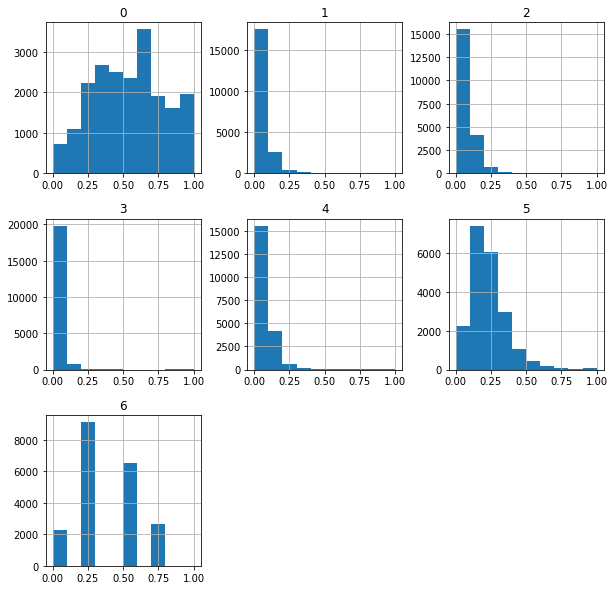

In [ ]:
# plot the hist for the normalized x 
# hist for standard scaler of x
x_mm_df=pd.DataFrame(x_mm)
x_mm_df.hist(figsize=(10,10))

In [ ]:
# split the data to train and test 
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_mm,y_mm.reshape(-1), test_size=0.2, random_state=42)

# Create and train 4 Machine Learning models.


# <font color='#F9d342'><b>Linear Regression </b> </font>

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
print(f"Max Error: {metrics.max_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"differen %Error: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Model coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 0.02522744181534567
R2 Score: 0.5471510008792229
Max Error: 0.9723386838551993
Mean Absolute Error: 0.11678269074153234
differen %Error: 0.5471743380922272
Model coefficient: [ 0.18447276 -1.51385207  1.34117204 -2.64603661  1.5073467   1.40550669
 -0.07576616]
Model Intercept: -0.03202203652719815


In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
y_pred= model.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
print(f"Max Error: {metrics.max_error(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")
print(f"differen %Error: {metrics.explained_variance_score(y_test,y_pred)}")
print(f"Model coefficient: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")


Mean Squared Error: 0.02522744181534567
R2 Score: 0.5471510008792229
Max Error: 0.9723386838551993
Mean Absolute Error: 0.11678269074153234
differen %Error: 0.5471743380922272
Model coefficient: [ 0.18447276 -1.51385207  1.34117204 -2.64603661  1.5073467   1.40550669
 -0.07576616]
Model Intercept: -0.03202203652719815


# <font color='#F9d342'><b>DecisionTree </b> </font>

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42, criterion="mae",max_depth=200,min_samples_leaf=2,max_leaf_nodes=100)
dt_fit = dt.fit(x_train, y_train)
y_pred= dt_fit.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")

print(r2_score(y_test, dt_fit.predict(x_test)))
print(dt_fit.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


Mean Squared Error: 0.022300838401183735
R2 Score: 0.5996854368568141
Mean Absolute Error: 0.09952687944841529
0.5996854368568141
0.5996854368568141


# <font color='#F9d342'><b> KNeighborsRegressor </b> </font>

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=7)

# Fit and score
model.fit(x_train, y_train)
y_pred= model.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred)}")



Mean Squared Error: 0.02024034220384863
R2 Score: 0.6366726846120649
Mean Absolute Error: 0.09896469711729974


# <font color='#F9d342'><b> Support Vector Machine </b></font>

In [ ]:
model_svm = svm.SVR(kernel='rbf', C=1e3, gamma = 0.9, epsilon = 0.05)
model_svm.fit(x_train,y_train)

y_pred1= model_svm.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred1)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred1)}")



Mean Squared Error: 0.018031346932220884
R2 Score: 0.676325587397105
Mean Absolute Error: 0.0907978314712047


# Use the right evaluation metrics to choose the best model.

## <font color='red'>The best model is Svm with kernel 'rbf' </font>

In [ ]:
model_svm = svm.SVR(kernel='rbf', C=1e3, gamma = 0.9, epsilon = 0.05)
model_svm.fit(x_train,y_train)

y_pred1= model_svm.predict(x_test)
print(f"Mean Squared Error: {metrics.mean_squared_error(y_test,y_pred1)}")
print(f"R2 Score: {metrics.r2_score(y_test,y_pred1)}")
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test,y_pred1)}")
# print(f"Model coefficient: {model_svm.coef_}")


Mean Squared Error: 0.018031346932220884
R2 Score: 0.676325587397105
Mean Absolute Error: 0.0907978314712047
